<a href="https://colab.research.google.com/github/r1thm/synthetic-flower-bloom-classifier/blob/main/synthetic_flower_bloom_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthetic Flower Bloom Classifier (98.8% Accuracy). I originally developed this program for Wat.AI, and the legacy version from September 18th, 2025 can still be accessed today in [here](https://github.com/r1thm/ai-skill-showcase-fork/commit/c0af9296adc2f9ab46d407cd91af62e38e39ac09). This is a reupload of my legacy project on a branch onto my own repository.

What does this function do?

This program uniquely generates two 8x8 pixelated flowers (bud and blossom). An AI model (Logistic Regression from Sklearn) is trained on these images to recognize and label which generated image is a bud or a blossom image. Each flower is unique, despite the uniformity we see from afar. I played with Gaussian noise to create these unique images with the hope of encouraging the AI to approach each unique flower with an informed decision, rather than rote memorization!

Let's have the AI generate, train, learn and predict the difference between a blooming flower and a bud
Accuracy Score: 0.9875


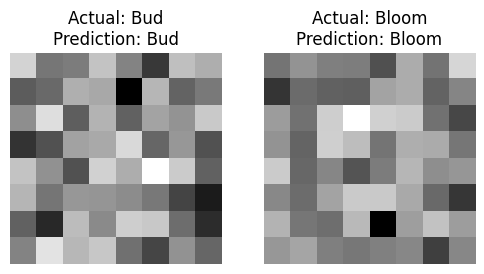

Yay! The AI can recognize what a bud or a bloomed flower looks like :D


In [19]:
# --- setup ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Let's have the AI generate, train, learn and predict the difference between a blooming flower and a bud")

# --- create a pixelated flower ---

def make_flower(flower_type="bud"): #generates a simple, uniform flower image.
    img = np.zeros((8, 8)) #the entire image starts off with a black slate.
    if flower_type == "bud":
        img[3:5, 3:5] = 1  # denotes a small square in the middle. =1 means white.
    elif flower_type == "bloom":
        img[2:6, 2:6] = 1  # denotes a larger white square (than bud) in the middle.
        img[3:5, 3:5] = 0  # centre becomes more hollow (petal effect). =0 means black.
    return img
# --- create an empty list for appending ---
X = []
y = []

# --- generate a unique flower each run with noise ---
for _ in range(200): # repeats noise dist for 200 buds & 200 blooms in a list. for AI training use.
    bud = make_flower("bud") + np.random.normal(0, 0.8, (8,8))  #adds Gaussian noise. (x,y,z) = (mean of norm.dist, STDEV, array).
    bloom = make_flower("bloom") + np.random.normal(0, 0.8, (8,8))
    X.append(bud.flatten())
    y.append(0)  # bud label
    X.append(bloom.flatten())
    y.append(1)  # bloom label

X = np.array(X)
y = np.array(y)

# --- train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #borrowed =42 from example. culture.
#20% of 200+200 samples are for testing, 80% for training.

# --- train the model ---
clf = LogisticRegression(max_iter=1000) #=1000 good for this noisy data.
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred)) # num of correct pred. / total num of pred.

# --- display the two outcomes ---
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

idx1, idx2 = 1, 2 #feel free to change the index values (i.e. 5, 35); you can have a successful bud-bud or bloom-bloom scenario.
axes[0].imshow(X_test[idx1].reshape(8, 8), cmap="gray")
axes[0].set_title(f"Actual: {'Bud' if y_test[idx1]==0 else 'Bloom'}\nPrediction: {'Bud' if clf.predict([X_test[idx1]])[0]==0 else 'Bloom'}")
axes[0].axis("off")

axes[1].imshow(X_test[idx2].reshape(8, 8), cmap="gray")
axes[1].set_title(f"Actual: {'Bud' if y_test[idx2]==0 else 'Bloom'}\nPrediction: {'Bud' if clf.predict([X_test[idx2]])[0]==0 else 'Bloom'}")
axes[1].axis("off")

plt.show()

# --- it's over ---
print("Yay! The AI can recognize what a bud or a bloomed flower looks like :D")